<AtomGroup [<Atom 1: C1 of type cc of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 2: H1 of type h4 of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 3: N1 of type na of resname TRP, resid 1 and segid seg_0_TRP>, ..., <Atom 646: C11 of type c of resname TRP, resid 24 and segid seg_0_TRP>, <Atom 647: O2 of type o of resname TRP, resid 24 and segid seg_0_TRP>, <Atom 648: O1 of type o of resname TRP, resid 24 and segid seg_0_TRP>]>
(24, 3)
24
<AtomGroup [<Atom 15: C8 of type cd of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 42: C8 of type cd of resname TRP, resid 2 and segid seg_0_TRP>, <Atom 69: C8 of type cd of resname TRP, resid 3 and segid seg_0_TRP>, ..., <Atom 582: C8 of type cd of resname TRP, resid 22 and segid seg_0_TRP>, <Atom 609: C8 of type cd of resname TRP, resid 23 and segid seg_0_TRP>, <Atom 636: C8 of type cd of resname TRP, resid 24 and segid seg_0_TRP>]>
24
<AtomGroup [<Atom 649: O12 of type oh of resname TA5, resid 25 and segid seg_1_TA5>, <Atom 650: H50 of 

  0%|          | 0/10001 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


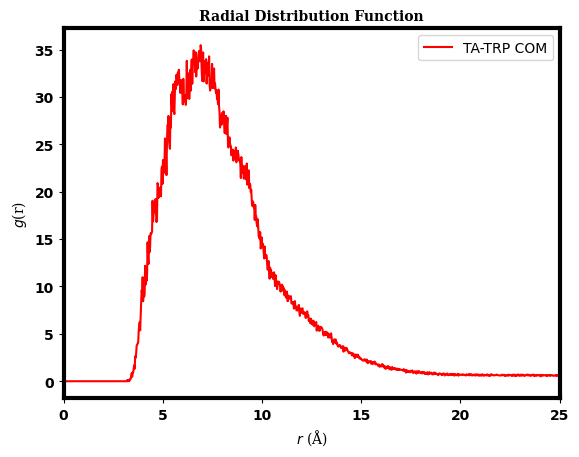

In [ ]:
import MDAnalysis as mda
import MDAnalysisData.datasets
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

TPR = 'md_0_sim_resp_24trp-1ta_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-1ta_500ns_pbc_center.xtc'


# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

trp = u.select_atoms("resname TRP")
print(u.select_atoms("resname TRP"))

trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
print(trp_coms.shape)
com_atoms = trp.select_atoms("resname TRP and name C8")
print(len(com_atoms))
print(com_atoms)
print(com_atoms.n_atoms)

com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")
class replace_with_COM:
    """Replace special atom `atomname` in each fragment with COM of the fragment."""
    def __init__(self, trp, atomname):
        self.trp = trp
        self.com_atoms = trp.select_atoms(f"name {atomname}")
        
        # sanity check
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.trp.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts
                                              
ta5 = u.select_atoms("resname TA5")
print(ta5)
print(ta5.n_atoms)


ta5_coms = ta5.center_of_mass(unwrap=True, compound="fragments")
print(ta5_coms.shape)

ta5_coms = ta5.center_of_mass(unwrap=True, compound="fragments")
com_atoms2 = ta5.select_atoms('resname TA5 and (name C1 or name C2 or name C3 or name C4 or name C5 or name O1 or name C6)')
# com_atoms2 = ta5.select_atoms('resname TA5 and (name C3)')

print(com_atoms2)
print(com_atoms2.n_atoms)
com_atoms2.positions[:1] = ta5_coms  # Replace the first atom's position with COM
# com_atoms2 = ta5.select_atoms("resname ta")
# print(com_atoms2)
# print(com_atoms2.n_atoms)


# com_atoms2.positions = ta5.center_of_mass(unwrap=True, compound="fragments")

class replace_with_COM:
    """Replace special atom `atomname` in each fragment with COM of the fragment."""
    def __init__(self, ta5, atomname):
        self.ta5 = ta5
        self.com_atoms2 = ta5.select_atoms(f"name {atomname}")
        
        # sanity check
        assert self.get_com().shape == self.com_atoms2.positions.shape
        
    def get_com(self):
        return self.ta5.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms2.positions = self.get_com()
        return ts
                               
                               
                               
comRDF = rdf.InterRDF(com_atoms2, com_atoms, 
                      nbins=1000,range=(0, 25), exclusion_block=(1, 1)).run(verbose=True)


                               
 #font1 = {'family': 'serif': ['Times New Roman'], 'size'f 10}
font1 = {'family':'serif','color':'black','size':10}
plt.title('Radial Distribution Function',fontdict= font1,fontweight='bold')

# plt.plot(comRDF.bins, comRDF.rdf, label="TA5-TRP COM",color='red')
plt.plot(comRDF.bins, comRDF.rdf, label="TA-TRP COM",color='red')
plt.xlabel(r"$r$ (Å)",fontdict=font1)
plt.ylabel(r"$g$(r)",fontdict=font1)
plt.legend(loc="best");

plt.figure(1,figsize = (5,4),dpi=3000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
#plt.axvline(x=6.15, color='b', linestyle='--', label='Cutoff at 6.15 Å')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlim(0,25)
# plt.ylim(0,50)
#plt.savefig('rdf_100mM_ta5-trp.png',dpi= 3000) # Other extensions: png, svg
#plt.grid(True)
plt.show()
                                             

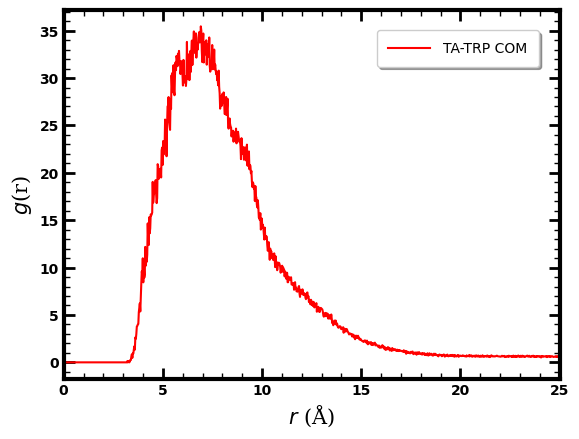

In [4]:
 #font1 = {'family': 'serif': ['Times New Roman'], 'size'f 10}
font1 = {'family':'serif','color':'black','size':15}
# plt.title('Radial Distribution Function',fontdict= font1,fontweight='bold')

# plt.plot(comRDF.bins, comRDF.rdf, label="TA5-TRP COM",color='red')
plt.plot(comRDF.bins, comRDF.rdf, label="TA-TRP COM",color='red')
plt.xlabel(r"$r$ (Å)",fontdict=font1)
plt.ylabel(r"$g$(r)",fontdict=font1)
plt.legend(loc="best");

plt.figure(1,figsize = (5,4),dpi=300)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
# plt.axvline(x=6.1, color='b', linestyle='--', label='Cutoff at 6.15 Å')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlim(0,25)
# plt.ylim(,23)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis='x', which='major', direction='in', length=8, width=2, color='black')
plt.tick_params(axis='y', which='major', direction='in', length=8, width=2, color='black')
plt.gca().tick_params(axis='both', which='minor', color='black', width=1, length=4, bottom=True, top=True, left=True, right=True, direction='in')
plt.minorticks_on()
plt.legend(loc="upper right", labelspacing=0.2, handlelength=3.0, handletextpad=1.0, borderaxespad=1.5, borderpad=0.8, fontsize=10, fancybox=True, shadow=True)
plt.savefig('rdf_ta5-trp.png',dpi= 1000) # Other extensions: png, svg
#plt.grid(True)
plt.show()

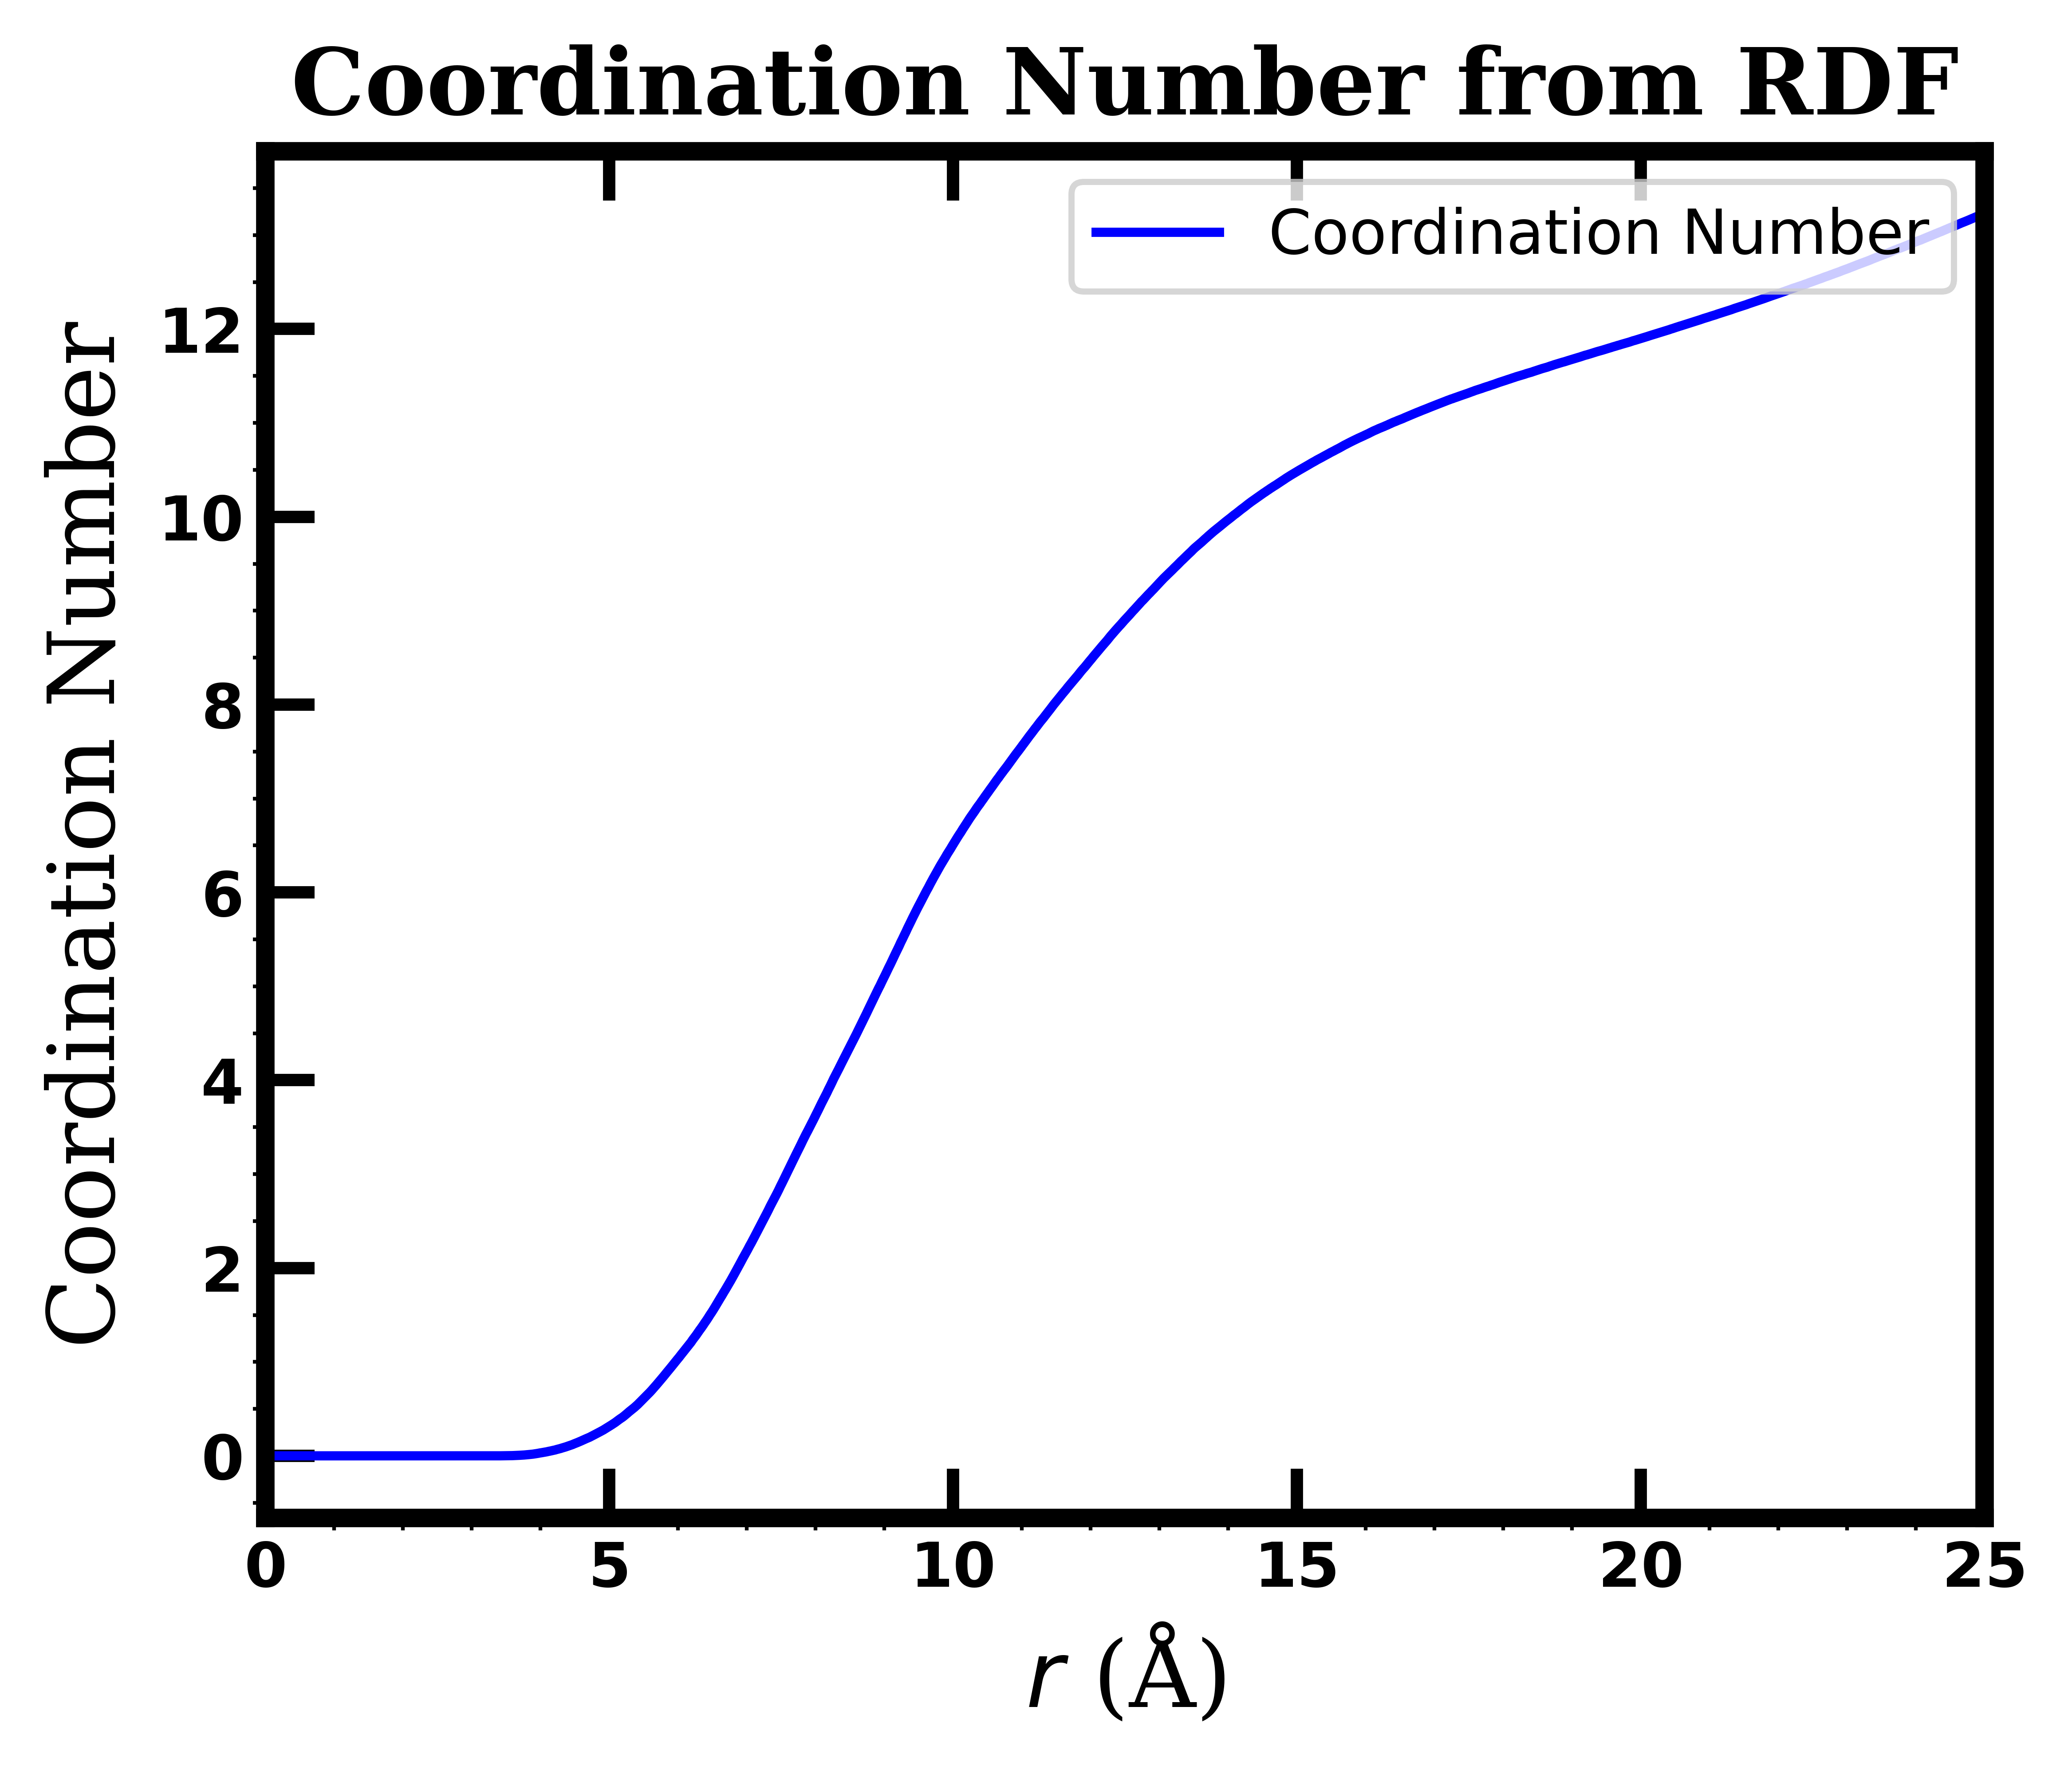

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Example RDF data (replace comRDF1.bins and comRDF1.rdf with actual data arrays)
r_values = comRDF.bins  # distance values in Å
g_r_values = comRDF.rdf  # RDF values

# Assume an approximate number density (ρ) for the system in particles/Å³
density = 6.563145399678004e-5 
# Calculate the differential element for the integration
dr = np.diff(r_values).mean()  # assuming evenly spaced bins

# Calculate cumulative coordination number (integral of RDF)
coordination_number = np.cumsum(4 * np.pi * density * g_r_values * r_values**2 * dr)

# # Plot the RDF
# font1 = {'family':'serif', 'color':'black', 'size':15}

# # Customizing plot aesthetics
# border_line_width = 3
# plt.gca().spines['top'].set_linewidth(border_line_width)
# plt.gca().spines['right'].set_linewidth(border_line_width)
# plt.gca().spines['bottom'].set_linewidth(border_line_width)
# plt.gca().spines['left'].set_linewidth(border_line_width)
# plt.xticks(fontweight='bold')
# plt.yticks(fontweight='bold')
# plt.tick_params(bottom=True, top=True, left=True, right=True, axis='x', which='major', direction='in', length=8, width=2, color='black')
# plt.tick_params(axis='y', which='major', direction='in', length=8, width=2, color='black')
# plt.minorticks_on()
# plt.grid(False)

# Plot the Coordination Number
font1 = {'family':'serif', 'color':'black', 'size':15}
plt.figure(figsize=(5, 4), dpi=1000)
plt.plot(r_values, coordination_number, label="Coordination Number", color='blue')
plt.xlabel(r"$r$ (Å)", fontdict=font1)
plt.ylabel("Coordination Number", fontdict=font1)
plt.legend(loc="upper right")
plt.title("Coordination Number from RDF", fontdict=font1, fontweight='bold')
# Customizing plot aesthetics
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(bottom=True, top=True, left=True, right=True, axis='x', which='major', direction='in', length=8, width=2, color='black')
plt.tick_params(axis='y', which='major', direction='in', length=8, width=2, color='black')
plt.minorticks_on()
plt.grid(False)
plt.xlim(0, 25)
plt.savefig('coordination_number.png', dpi=1000)
plt.show()


/var/folders/jc/r1qz74_n1_9613zrlx8dzt4r0000gn/T/ipykernel_1441/2561307415.py:15: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  kb_integral = cumtrapz(integrand, r, initial=10)


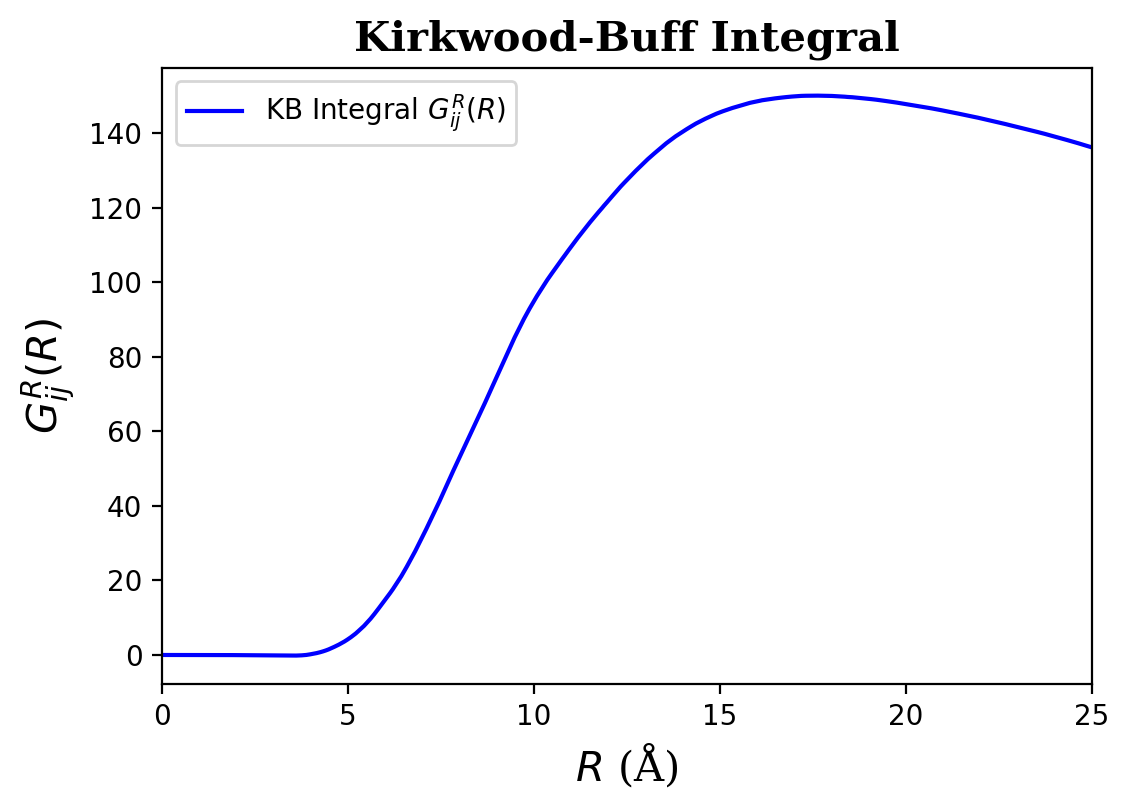

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# Load RDF data
# Assuming comRDF1.bins contains the distance bins (r) and comRDF1.rdf contains the RDF values (g(r))
r = comRDF.bins  # distance bins (r)
g_r = comRDF.rdf # RDF values (g(r))
g_r = g_r
# Calculate the KB integral
# Define the integrand (g(r) - 1) * 4 * pi * r^2
integrand = (g_r - 1) * 4 * np.pi * r**2

# Cumulative integral from 0 to R
kb_integral = cumtrapz(integrand, r, initial=10)
kb_integral = kb_integral/1000

# Plot KB integral
font1 = {'family': 'serif', 'color': 'black', 'size': 15}
plt.figure(figsize=(6, 4), dpi=200)
plt.plot(r, kb_integral, label="KB Integral $G_{ij}^R(R)$", color='blue')
plt.xlabel(r"$R$ (Å)", fontdict=font1)
plt.ylabel(r"$G_{ij}^R(R)$", fontdict=font1)
plt.xlim(0,25)
# plt.ylim(-400,4000)
plt.title("Kirkwood-Buff Integral", fontdict=font1, fontweight='bold')
plt.legend(loc="best")
plt.show()


<AtomGroup [<Atom 1: C1 of type cc of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 2: H1 of type h4 of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 3: N1 of type na of resname TRP, resid 1 and segid seg_0_TRP>, ..., <Atom 646: C11 of type c of resname TRP, resid 24 and segid seg_0_TRP>, <Atom 647: O2 of type o of resname TRP, resid 24 and segid seg_0_TRP>, <Atom 648: O1 of type o of resname TRP, resid 24 and segid seg_0_TRP>]>
(24, 3)
24
<AtomGroup [<Atom 15: C8 of type cd of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 42: C8 of type cd of resname TRP, resid 2 and segid seg_0_TRP>, <Atom 69: C8 of type cd of resname TRP, resid 3 and segid seg_0_TRP>, ..., <Atom 582: C8 of type cd of resname TRP, resid 22 and segid seg_0_TRP>, <Atom 609: C8 of type cd of resname TRP, resid 23 and segid seg_0_TRP>, <Atom 636: C8 of type cd of resname TRP, resid 24 and segid seg_0_TRP>]>
24
<AtomGroup [<Atom 649: O12 of type oh of resname TA5, resid 25 and segid seg_1_TA5>, <Atom 650: H50 of 

  0%|          | 0/10001 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


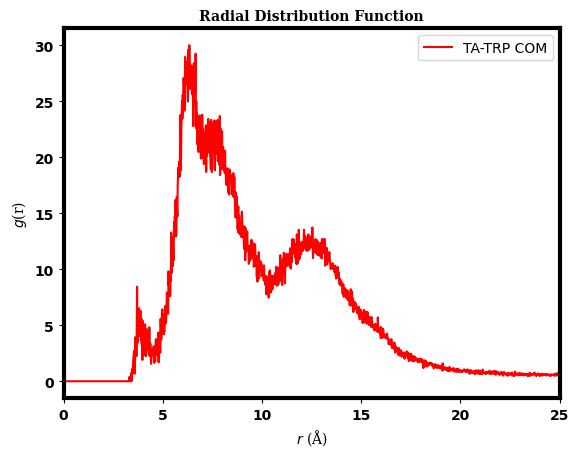

In [12]:
import MDAnalysis as mda
import MDAnalysisData.datasets
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

# # Replace with the correct file paths
# TPR = 'md_0_100ns_trp100mM-ta.tpr'
# XTC = 'md_0_100ns_trp100mM-ta_pbc_center.xtc'

TPR = 'md_0_sim_resp_24trp-2ta_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-2ta_500ns_pbc_center.xtc'

# TPR = 'md_sim_8trp-6ta_100ns.tpr'
# XTC = 'md_sim_8trp-6ta_100ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

trp = u.select_atoms("resname TRP")
print(u.select_atoms("resname TRP"))

trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
print(trp_coms.shape)
#com_atoms = trp.select_atoms("name C2")
com_atoms = trp.select_atoms("resname TRP and name C8")
print(len(com_atoms))
print(com_atoms)
print(com_atoms.n_atoms)

com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")
class replace_with_COM:
    """Replace special atom `atomname` in each fragment with COM of the fragment."""
    def __init__(self, trp, atomname):
        self.trp = trp
        self.com_atoms = trp.select_atoms(f"name {atomname}")
        
        # sanity check
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.trp.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts
                                              
ta5 = u.select_atoms("resname TA5")
print(ta5)
print(ta5.n_atoms)


ta5_coms = ta5.center_of_mass(unwrap=True, compound="fragments")
print(ta5_coms.shape)

ta5_coms = ta5.center_of_mass(unwrap=True, compound="fragments")
# com_atoms2 = ta5.select_atoms('resname TA5 and (name C1 or name C2 or name C3 or name C4 or name C5 or name O1 or name C6)')
com_atoms2 = ta5.select_atoms('resname TA5 and (name C3)')
print(com_atoms2)
print(com_atoms2.n_atoms)
com_atoms2.positions[:2] = ta5_coms  # Replace the first atom's position with COM
# com_atoms2 = ta5.select_atoms("resname ta")
# print(com_atoms2)
# print(com_atoms2.n_atoms)


# com_atoms2.positions = ta5.center_of_mass(unwrap=True, compound="fragments")

class replace_with_COM:
    """Replace special atom `atomname` in each fragment with COM of the fragment."""
    def __init__(self, ta5, atomname):
        self.ta5 = ta5
        self.com_atoms2 = ta5.select_atoms(f"name {atomname}")
        
        # sanity check
        assert self.get_com().shape == self.com_atoms2.positions.shape
        
    def get_com(self):
        return self.ta5.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms2.positions = self.get_com()
        return ts
                               
                               
                               
comRDF2 = rdf.InterRDF(com_atoms2, com_atoms, 
                      nbins=1500,range=(0, 25), exclusion_block=(1, 1)).run(verbose=True)


                               
 #font1 = {'family': 'serif': ['Times New Roman'], 'size'f 10}
font1 = {'family':'serif','color':'black','size':10}
plt.title('Radial Distribution Function',fontdict= font1,fontweight='bold')

plt.plot(comRDF2.bins, comRDF2.rdf, label="TA-TRP COM",color='red')
plt.xlabel(r"$r$ (Å)",fontdict=font1)
plt.ylabel(r"$g$(r)",fontdict=font1)
plt.legend(loc="best");

plt.figure(1,figsize = (5,4),dpi=3000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
#plt.axvline(x=6.15, color='b', linestyle='--', label='Cutoff at 6.15 Å')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlim(0,25)
# plt.ylim(0,35)
#plt.savefig('rdf_100mM_ta5-trp.png',dpi= 3000) # Other extensions: png, svg
#plt.grid(True)
plt.show()
                                             

<AtomGroup [<Atom 1: C1 of type cc of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 2: H1 of type h4 of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 3: N1 of type na of resname TRP, resid 1 and segid seg_0_TRP>, ..., <Atom 646: C11 of type c of resname TRP, resid 24 and segid seg_0_TRP>, <Atom 647: O2 of type o of resname TRP, resid 24 and segid seg_0_TRP>, <Atom 648: O1 of type o of resname TRP, resid 24 and segid seg_0_TRP>]>
(24, 3)
24
<AtomGroup [<Atom 15: C8 of type cd of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 42: C8 of type cd of resname TRP, resid 2 and segid seg_0_TRP>, <Atom 69: C8 of type cd of resname TRP, resid 3 and segid seg_0_TRP>, ..., <Atom 582: C8 of type cd of resname TRP, resid 22 and segid seg_0_TRP>, <Atom 609: C8 of type cd of resname TRP, resid 23 and segid seg_0_TRP>, <Atom 636: C8 of type cd of resname TRP, resid 24 and segid seg_0_TRP>]>
24
<AtomGroup [<Atom 649: O12 of type oh of resname TA5, resid 25 and segid seg_1_TA5>, <Atom 650: H50 of 

  0%|          | 0/10001 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


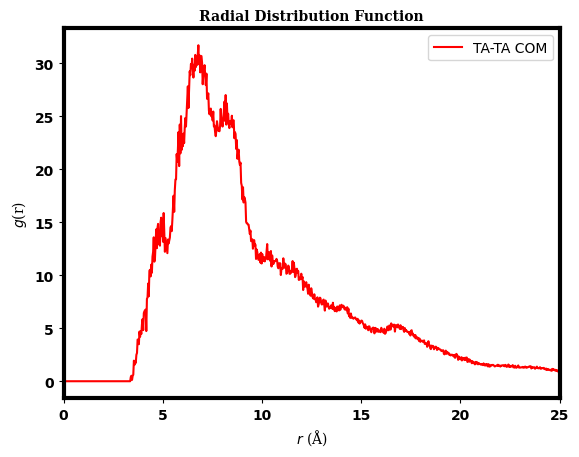

In [14]:
import MDAnalysis as mda
import MDAnalysisData.datasets
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

# # Replace with the correct file paths
# TPR = 'md_0_100ns_trp100mM-ta.tpr'
# XTC = 'md_0_100ns_trp100mM-ta_pbc_center.xtc'

# # Replace with the correct file paths
# TPR = 'md_sim_8trp-2ta_100ns.tpr'
# XTC = 'md_sim_8trp-2ta_100ns_pbc_center.xtc'

# Replace with the correct file paths
TPR = 'md_0_sim_resp_24trp-3ta_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-3ta_500ns_pbc_center.xtc'



# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

trp = u.select_atoms("resname TRP")
print(u.select_atoms("resname TRP"))

trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
print(trp_coms.shape)
#com_atoms = trp.select_atoms("name C2")
com_atoms = trp.select_atoms("resname TRP and name C8")
print(len(com_atoms))
print(com_atoms)
print(com_atoms.n_atoms)

com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")
class replace_with_COM:
    """Replace special atom `atomname` in each fragment with COM of the fragment."""
    def __init__(self, trp, atomname):
        self.trp = trp
        self.com_atoms = trp.select_atoms(f"name {atomname}")
        
        # sanity check
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.trp.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts
                                              
ta5 = u.select_atoms("resname TA5")
print(ta5)
print(ta5.n_atoms)


ta5_coms = ta5.center_of_mass(unwrap=True, compound="fragments")
print(ta5_coms.shape)

ta5_coms = ta5.center_of_mass(unwrap=True, compound="fragments")
# com_atoms2 = ta5.select_atoms('resname TA5 and (name C1 or name C2 or name C3 or name C4 or name C5 or name O1 or name C6)')
com_atoms2 = ta5.select_atoms('resname TA5 and name C3 ')


print(com_atoms2)
print(com_atoms2.n_atoms)
com_atoms2.positions[:3] = ta5_coms  # Replace the first atom's position with COM
# com_atoms2 = ta5.select_atoms("resname ta")
# print(com_atoms2)
# print(com_atoms2.n_atoms)


# com_atoms2.positions = ta5.center_of_mass(unwrap=True, compound="fragments")

class replace_with_COM:
    """Replace special atom `atomname` in each fragment with COM of the fragment."""
    def __init__(self, ta5, atomname):
        self.ta5 = ta5
        self.com_atoms2 = ta5.select_atoms(f"name {atomname}")
        
        # sanity check
        assert self.get_com().shape == self.com_atoms2.positions.shape
        
    def get_com(self):
        return self.ta5.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms2.positions = self.get_com()
        return ts
                               
                               
                               
comRDF3 = rdf.InterRDF(com_atoms2, com_atoms, 
                      nbins=800,range=(0, 25), exclusion_block=(1, 1)).run(verbose=True)


                               
 #font1 = {'family': 'serif': ['Times New Roman'], 'size'f 10}
font1 = {'family':'serif','color':'black','size':10}
plt.title('Radial Distribution Function',fontdict= font1,fontweight='bold')

plt.plot(comRDF3.bins, comRDF3.rdf, label="TA-TA COM",color='red')
plt.xlabel(r"$r$ (Å)",fontdict=font1)
plt.ylabel(r"$g$(r)",fontdict=font1)
plt.legend(loc="best");

plt.figure(1,figsize = (5,4),dpi=3000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
#plt.axvline(x=6.15, color='b', linestyle='--', label='Cutoff at 6.15 Å')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlim(0,25)
# plt.ylim(0,35)
#plt.savefig('rdf_100mM_ta5-trp.png',dpi= 3000) # Other extensions: png, svg
#plt.grid(True)
plt.show()
                                             

<AtomGroup [<Atom 1: C1 of type cc of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 2: N1 of type na of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 3: C2 of type ca of resname TRP, resid 1 and segid seg_0_TRP>, ..., <Atom 214: H10 of type hn of resname TRP, resid 8 and segid seg_0_TRP>, <Atom 215: H11 of type hn of resname TRP, resid 8 and segid seg_0_TRP>, <Atom 216: H12 of type hn of resname TRP, resid 8 and segid seg_0_TRP>]>
(8, 3)
8
<AtomGroup [<Atom 9: C8 of type cd of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 36: C8 of type cd of resname TRP, resid 2 and segid seg_0_TRP>, <Atom 63: C8 of type cd of resname TRP, resid 3 and segid seg_0_TRP>, <Atom 90: C8 of type cd of resname TRP, resid 4 and segid seg_0_TRP>, <Atom 117: C8 of type cd of resname TRP, resid 5 and segid seg_0_TRP>, <Atom 144: C8 of type cd of resname TRP, resid 6 and segid seg_0_TRP>, <Atom 171: C8 of type cd of resname TRP, resid 7 and segid seg_0_TRP>, <Atom 198: C8 of type cd of resname TRP, resid

  0%|          | 0/10001 [00:00<?, ?it/s]

/home/photon/anaconda3/lib/python3.11/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/photon/anaconda3/lib/python3.11/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


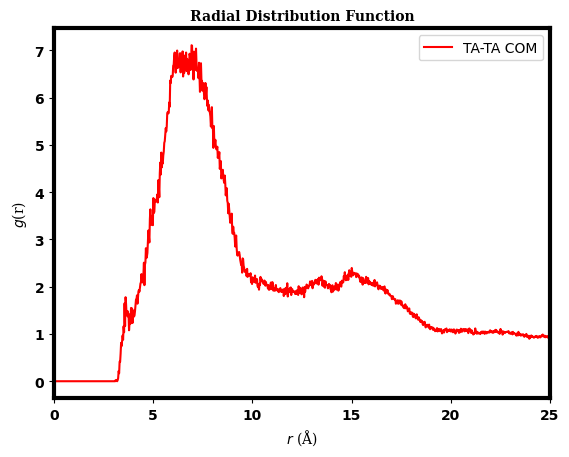

In [12]:
import MDAnalysis as mda
import MDAnalysisData.datasets
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

# # Replace with the correct file paths
# TPR = 'md_0_100ns_trp100mM-ta.tpr'
# XTC = 'md_0_100ns_trp100mM-ta_pbc_center.xtc'

# # Replace with the correct file paths
# TPR = 'md_sim_8trp-2ta_100ns.tpr'
# XTC = 'md_sim_8trp-2ta_100ns_pbc_center.xtc'

# Replace with the correct file paths
TPR = 'md_sim_100mM-6ta_100ns.tpr'
XTC = 'md_sim_100mM-6ta_100ns_pbc_center.xtc'



# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

trp = u.select_atoms("resname TRP")
print(u.select_atoms("resname TRP"))

trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
print(trp_coms.shape)
#com_atoms = trp.select_atoms("name C2")
com_atoms = trp.select_atoms("resname TRP and name C8")
print(len(com_atoms))
print(com_atoms)
print(com_atoms.n_atoms)

com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")
class replace_with_COM:
    """Replace special atom `atomname` in each fragment with COM of the fragment."""
    def __init__(self, trp, atomname):
        self.trp = trp
        self.com_atoms = trp.select_atoms(f"name {atomname}")
        
        # sanity check
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.trp.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts
                                              
ta5 = u.select_atoms("resname ta")
print(ta5)
print(ta5.n_atoms)


ta5_coms = ta5.center_of_mass(unwrap=True, compound="fragments")
print(ta5_coms.shape)

ta5_coms = ta5.center_of_mass(unwrap=True, compound="fragments")
com_atoms2 = ta5.select_atoms('resname ta and (name C1 or name C2 or name C3 or name C4 or name C5 or name O1 or name C6)')
print(com_atoms2)
print(com_atoms2.n_atoms)
com_atoms2.positions[:6] = ta5_coms  # Replace the first atom's position with COM
# com_atoms2 = ta5.select_atoms("resname ta")
# print(com_atoms2)
# print(com_atoms2.n_atoms)


# com_atoms2.positions = ta5.center_of_mass(unwrap=True, compound="fragments")

class replace_with_COM:
    """Replace special atom `atomname` in each fragment with COM of the fragment."""
    def __init__(self, ta5, atomname):
        self.ta5 = ta5
        self.com_atoms2 = ta5.select_atoms(f"name {atomname}")
        
        # sanity check
        assert self.get_com().shape == self.com_atoms2.positions.shape
        
    def get_com(self):
        return self.ta5.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms2.positions = self.get_com()
        return ts
                               
                               
                               
comRDF4 = rdf.InterRDF(com_atoms2, com_atoms, 
                      nbins=1000,range=(0, 25), exclusion_block=(1, 1)).run(verbose=True)


                               
 #font1 = {'family': 'serif': ['Times New Roman'], 'size'f 10}
font1 = {'family':'serif','color':'black','size':10}
plt.title('Radial Distribution Function',fontdict= font1,fontweight='bold')

plt.plot(comRDF4.bins, comRDF4.rdf, label="TA-TA COM",color='red')
plt.xlabel(r"$r$ (Å)",fontdict=font1)
plt.ylabel(r"$g$(r)",fontdict=font1)
plt.legend(loc="best");

plt.figure(1,figsize = (5,4),dpi=3000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
#plt.axvline(x=6.15, color='b', linestyle='--', label='Cutoff at 6.15 Å')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlim(0,25)
# plt.ylim(0,35)
#plt.savefig('rdf_100mM_ta5-trp.png',dpi= 3000) # Other extensions: png, svg
#plt.grid(True)
plt.show()
                                             

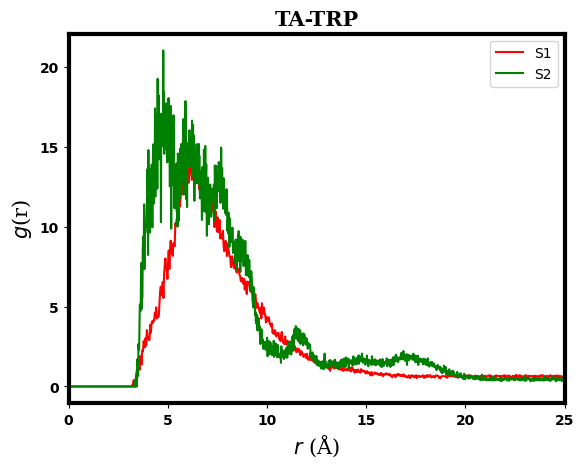

In [13]:
font1 = {'family':'serif','color':'black','size':15}
plt.title('TA-TRP',fontdict= font1,fontweight='bold')
plt.plot(comRDF.bins, comRDF.rdf, label="S1",color='red')
plt.plot(comRDF2.bins, comRDF2.rdf, label="S2",color='green')
# plt.plot(comRDF3.bins, comRDF3.rdf, label="S3",color='cyan')
# plt.plot(comRDF4.bins, comRDF4.rdf, label="S4",color='blue')
plt.xlabel(r"$r$ (Å)",fontdict=font1)
plt.ylabel(r"$g$(r)",fontdict=font1)
plt.legend(loc="best");

plt.figure(1,figsize = (5,4),dpi=3000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
#plt.axvline(x=6.15, color='b', linestyle='--', label='Cutoff at 6.15 Å')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlim(0,25)
# plt.ylim(0,25)
# plt.savefig('rdf_ta5-trp.png',dpi= 2000) # Other extensions: png, svg
#plt.grid(True)
plt.show()

[[28.22754995 11.21436568 25.72984778]
 [43.43248615 21.13912288  1.99634798]
 [13.40541192 37.87547102 12.38290705]
 [15.84884689 23.45026065 16.89154425]
 [12.87290723 22.50035756  1.00778819]
 [21.66452342 27.64955932 45.37333156]
 [20.00828445 13.38305127 29.94112274]
 [ 4.32331437 24.42227645 24.59870498]]


/home/photon/anaconda3/lib/python3.11/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/photon/anaconda3/lib/python3.11/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


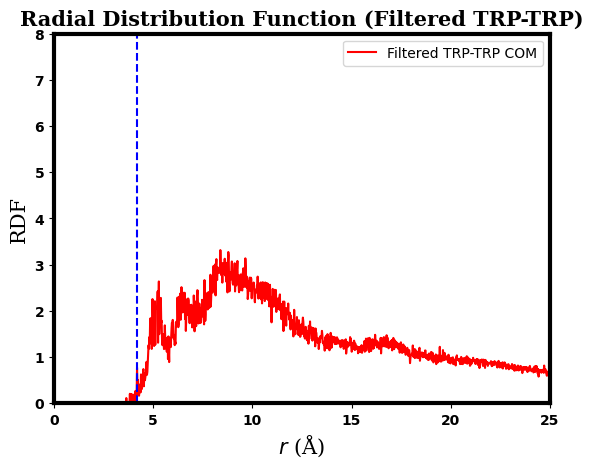

In [14]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

# Replace with the correct file paths
TPR2 = 'md_sim_8trp-2ta_100ns.tpr'
XTC2 = 'md_sim_8trp-2ta_100ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR2, XTC2)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname ta")

# Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")

# Define a class to replace TRP and TA positions with their COM
class ReplaceWithCOM:
    def __init__(self, molecule, atomname):
        self.molecule = molecule
        self.com_atoms = molecule.select_atoms(f"name {atomname}")
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.molecule.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts

# Replace positions with COM
trp_com_atoms = trp.select_atoms("resname TRP and name C8")
# ta_com_atoms = ta.select_atoms("resname ta and (name C1 or name C2 or name C3 or name C4 or name C5 or name O1 or name C6)")
ta_com_atoms = ta.select_atoms("resname ta and name C3")

trp_com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")
ta_com_atoms.positions = ta.center_of_mass(unwrap=True, compound="fragments")

# Calculate RDF between TA and TRP with a 6 Å cutoff
rdf_ta_trp = rdf.InterRDF(ta_com_atoms, trp_com_atoms, nbins=1000, range=(0, 25)).run()

# Find TRP pairs that are outside the 6 Å cutoff distance from any TA
trp_indices_to_include = []

for i, trp_com in enumerate(trp_coms):
    ta_distances = np.linalg.norm(ta_coms - trp_com, axis=1)
    if np.all(ta_distances > 12.0):
        trp_indices_to_include.append(i)

# Select only TRP atoms that are not within 6 Å of TA
trp_coms_filtered = trp_coms[trp_indices_to_include]
print(trp_coms_filtered)
# Calculate RDF for the filtered TRP-TRP interactions
rdf_trp_trp_filtered = rdf.InterRDF(trp_com_atoms[trp_indices_to_include], 
                                    trp_com_atoms[trp_indices_to_include], 
                                    nbins=1500, range=(0, 30)).run()

# Plot the RDF
font1 = {'family':'serif','color':'black','size':15}
plt.title('Radial Distribution Function (Filtered TRP-TRP)', fontdict=font1, fontweight='bold')

plt.plot(rdf_trp_trp_filtered.bins, rdf_trp_trp_filtered.rdf, label="Filtered TRP-TRP COM", color='red')
plt.xlabel(r"$r$ (Å)", fontdict=font1)
plt.ylabel("RDF", fontdict=font1)
plt.legend(loc="best")

plt.figure(1, figsize=(5,4), dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
plt.axvline(x=4.21, color='b', linestyle='--', label='Cutoff at 5.14 Å')

plt.xlim(0, 25)
plt.ylim(0, 8)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
#plt.savefig('rdf_trp_trp_filtered.png', dpi=2000)
plt.show()
